In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tensorflow as tf
from sklearn import preprocessing
from sklearn.utils import shuffle

In [171]:
#since I am using colab.research.google.com have to do the follwoing to import my data set
from google.colab import files

!rm train.csv
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test.csv to test (2).csv
Saving train.csv to train.csv
User uploaded file "test.csv" with length 28629 bytes
User uploaded file "train.csv" with length 61194 bytes


In [172]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data = train_data.drop(['PassengerId','Name','Ticket'], axis=1)
test_data = test_data.drop(['PassengerId','Name','Ticket'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [173]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [174]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [0]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

In [0]:
def show_bar_chart(feature):
  survived = train_data[train_data['Survived']==1][feature].value_counts()
  dead = train_data[train_data['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar')

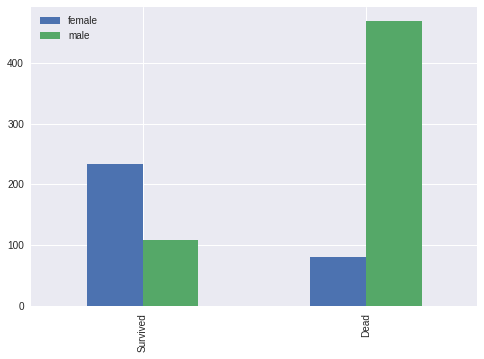

In [177]:
show_bar_chart('Sex')

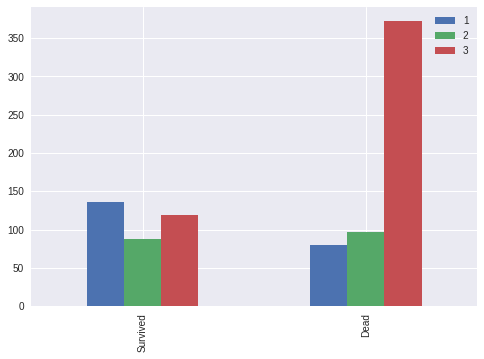

In [178]:
show_bar_chart('Pclass')

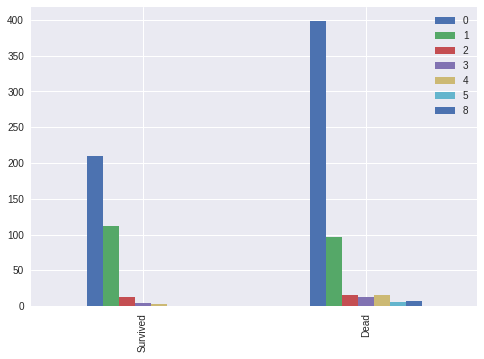

In [179]:
show_bar_chart('SibSp')

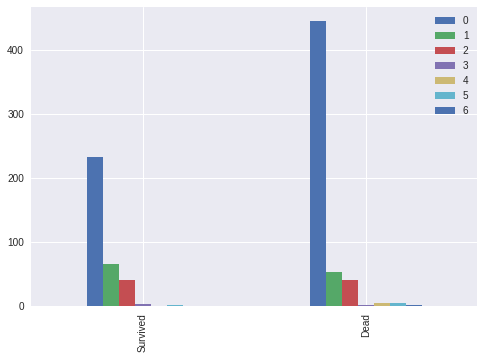

In [180]:
show_bar_chart('Parch')

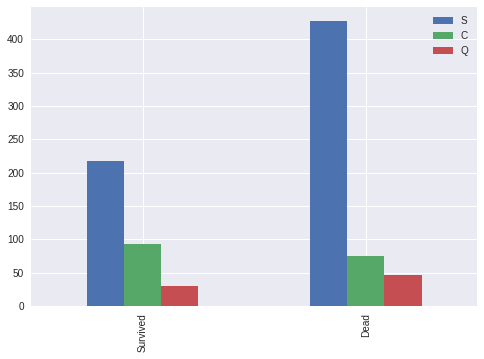

In [181]:
show_bar_chart('Embarked')

In [0]:
#divide age into classes
# 0-16 : 0
# 17-26 : 1
# 27-36 : 2
# 37-62 : 3
# >62 : 4

conditions = [
    (train_data['Age'] <= 16),
    (train_data['Age'] > 16) & (train_data['Age'] <=26),
    (train_data['Age'] > 26) & (train_data['Age'] <=36),
    (train_data['Age'] > 36) & (train_data['Age'] <=62),
    (train_data['Age'] > 62)]

test_conditions = [
    (test_data['Age'] <= 16),
    (test_data['Age'] > 16) & (test_data['Age'] <=26),
    (test_data['Age'] > 26) & (test_data['Age'] <=36),
    (test_data['Age'] > 36) & (test_data['Age'] <=62),
    (test_data['Age'] > 62)]
choices = [0, 1, 2,3,4]
train_data['Age'] = np.select(conditions, choices)
test_data['Age'] = np.select(test_conditions, choices)

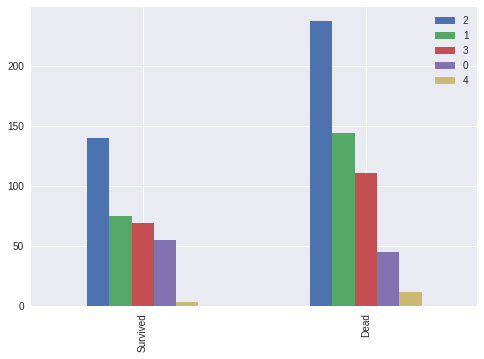

In [183]:
show_bar_chart('Age')

In [0]:
#from the embarked graph we can see that most passengers embared from S so lets fill na with S
train_data['Embarked'] = train_data['Embarked'].fillna('S') 
test_data['Embarked'] = test_data['Embarked'].fillna('S')

In [185]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [186]:
#lets study fare a litte
train_data['Fare']

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
861     11.5000
862     25.9292
863     69.5500
864     13.0000
865     13.0000
866     13.8583
867     50.4958
868      9.5000
869     11.1333
870      7.8958
871     52.5542
872      5.0000
873      9.0000
874     24.0000
875      7.2250
876      9.8458
877      7.8958
878      7.8958
879     83.1583
880     26.0000
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
887     30.0000
888     23.4500
889     30.0000
890      7.7500
Name: Fare, Length: 891,

In [187]:
bin_size = (train_data['Fare'].max() - train_data['Fare'].min())/25
bin_size

20.493168

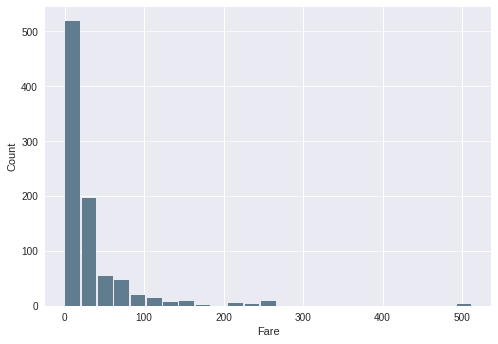

In [188]:
train_data['Fare'].plot.hist(grid=True, bins=25, rwidth=0.9,
                   color='#607c8e')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)

In [189]:
#divide fare into classes
# 0-20 : 0
# 20-40 : 1
# 40-100 : 2
# >100 : 3

conditions = [
    (train_data['Fare'] <= 20),
    (train_data['Fare'] > 20) & (train_data['Fare'] <=40),
    (train_data['Fare'] > 40) & (train_data['Fare'] <=100),
    (train_data['Fare'] > 100)]
test_conditions = [
    (test_data['Fare'] <= 20),
    (test_data['Fare'] > 20) & (test_data['Fare'] <=40),
    (test_data['Fare'] > 40) & (test_data['Fare'] <=100),
    (test_data['Fare'] > 100)]
choices = [0, 1, 2,3]
train_data['Fare'] = np.select(conditions, choices)
test_data['Fare'] = np.select(test_conditions, choices)

test_data.head() 

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,2,0,0,0,NaN,Q
1,3,female,3,1,0,0,NaN,S
2,2,male,3,0,0,0,NaN,Q
3,3,male,2,0,0,0,NaN,S
4,3,female,1,1,1,0,NaN,S


In [0]:
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [191]:
train_data['Embarked'] = train_data['Embarked'].map({'S':0,'C':1,'Q':2})
test_data['Embarked'] = test_data['Embarked'].map({'S':0,'C':1,'Q':2})

train_data['Sex'] = train_data['Sex'].map({'male':0,'female':1})
test_data['Sex'] = test_data['Sex'].map({'male':0,'female':1})
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,0
1,1,1,1,3,1,0,2,1
2,1,3,1,1,0,0,0,0
3,1,1,1,2,1,0,2,0
4,0,3,0,2,0,0,0,0


In [192]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,2,0,0,0,2
1,3,1,3,1,0,0,0
2,2,0,3,0,0,0,2
3,3,0,2,0,0,0,0
4,3,1,1,1,1,0,0


##NUERAL NETWORK

In [0]:
targets = train_data['Survived']
training_df = train_data.copy()
training_df = training_df.drop(['Survived'], axis=1)

In [194]:
print(targets.shape[0]) #total records
print(int(np.sum(targets))) #total ones

891
342


In [0]:
#balance data set as there are more 0s in targets than 1s
#so count 1s so that equal 0s can be used

target_one_count = int(np.sum(targets)) #as we have 0s and 1s in target so sum of all targets will give us count of 1s
#now traverse over data set and select indices to keep and the ones to delete.Start deleting when count for 0s becomes equal to count of 1s
target_zero_count = 0
indices_to_delete_for_balancing = []

no_of_rows_in_data_set = training_df.shape[0] #gets us the number of rows in data set

for i in range(no_of_rows_in_data_set):
  if(targets[i] == 0):
    target_zero_count += 1
    if(target_zero_count > target_one_count):
      indices_to_delete_for_balancing.append(i)
      
unscaled_but_balanced_data = training_df.drop(indices_to_delete_for_balancing, axis=0) #axis 0 as we want to delete rows
balanced_targets = targets.drop(indices_to_delete_for_balancing,axis=0)

In [196]:
#merging targets to scaled_and_balanced_data so that shuffling keeps relationship between rows and target
shuffled_data = unscaled_but_balanced_data.copy()
shuffled_data['Targets'] = balanced_targets
shuffled_data  = shuffle(shuffled_data)
shuffled_targets = shuffled_data['Targets']
print(shuffled_targets.unique())
shuffled_data = shuffled_data.drop(['Targets'],axis=1)
shuffled_data.head()

[0 1]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
210,3,0,1,0,0,0,0
121,3,0,2,0,0,0,0
523,1,1,3,0,1,2,1
236,2,0,3,1,0,1,0
124,1,0,3,0,1,2,0


In [197]:
shuffled_data.shape[0]

684

In [198]:
#split into training, validation and test
sample_count_of_preprocess_data = shuffled_data.shape[0]

training_sample_count = int(0.8*sample_count_of_preprocess_data)
validation_sample_count = int(0.1*sample_count_of_preprocess_data)
test_sample_count = sample_count_of_preprocess_data - training_sample_count - validation_sample_count

#time to divide data into these training, validation and test
training_data = shuffled_data[:training_sample_count] #start to training_sample_count
validation_data = shuffled_data[training_sample_count : training_sample_count + validation_sample_count]
testing_data = shuffled_data[training_sample_count + validation_sample_count : ] #everything that is left

training_targets = shuffled_targets[:training_sample_count]
validation_targets = shuffled_targets[training_sample_count : training_sample_count + validation_sample_count]
test_targets = shuffled_targets[training_sample_count + validation_sample_count :]

#since we have balanced the data before spliting, it is a good idea to check here if the splitted data are balanced too. should be close to 50% for each seta s we only have 2 categories
print("% of 1s in training data: " + str(np.sum(training_targets)/training_sample_count))
print("% of 1s in validation data: " + str(np.sum(validation_targets)/validation_sample_count))
print("% of 1s in test data: " + str(np.sum(test_targets)/test_sample_count))

#also that the total count adds up
print("total: " + str(training_sample_count + validation_sample_count + test_sample_count))

% of 1s in training data: 0.5009140767824497
% of 1s in validation data: 0.5294117647058824
% of 1s in test data: 0.463768115942029
total: 684


In [0]:
#save 3 data sets in npz files
np.savez('Titanic_Training_Data.npz',inputs=training_data, targets = training_targets)
np.savez('Titanic_Validation_Data.npz',inputs=validation_data, targets = validation_targets)
np.savez('Titanic_Test_Data.npz',inputs=testing_data, targets = test_targets)
#data now is preprocessed. So pre processing complete

##Model

In [0]:

# Create a class that will do the batching for the algorithm
# This code is extremely reusable. You should just change Audiobooks_data everywhere in the code
class Data_Reader():
    # Dataset is a mandatory arugment, while the batch_size is optional
    # If you don't input batch_size, it will automatically take the value: None
    def __init__(self, dataset, batch_size = None):
    
        # The dataset that loads is one of "train", "validation", "test".
        # e.g. if I call this class with x('train',5), it will load 'Audiobooks_data_train.npz' with a batch size of 5.
        npz = np.load('Titanic_{0}_Data.npz'.format(dataset))
        
        # Two variables that take the values of the inputs and the targets. Inputs are floats, targets are integers
        self.inputs, self.targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)
        
        # Counts the batch number, given the size you feed it later
        # If the batch size is None, we are either validating or testing, so we want to take the data in a single batch
        if batch_size is None:
            self.batch_size = self.inputs.shape[0]
        else:
            self.batch_size = batch_size
        self.curr_batch = 0
        self.batch_count = self.inputs.shape[0] // self.batch_size
    
    # A method which loads the next batch
    def __next__(self):
        if self.curr_batch >= self.batch_count:
            self.curr_batch = 0
            raise StopIteration()
            
        # You slice the dataset in batches and then the "next" function loads them one after the other
        batch_slice = slice(self.curr_batch * self.batch_size, (self.curr_batch + 1) * self.batch_size)
        inputs_batch = self.inputs[batch_slice]
        targets_batch = self.targets[batch_slice]
        self.curr_batch += 1
        
        # One-hot encode the targets. In this example it's a bit superfluous since we have a 0/1 column 
        # as a target already but we're giving you the code regardless, as it will be useful for any 
        # classification task with more than one target column
        classes_num = 2
        targets_one_hot = np.zeros((targets_batch.shape[0], classes_num))
        targets_one_hot[range(targets_batch.shape[0]), targets_batch] = 1
        
        # The function will return the inputs batch and the one-hot encoded targets
        return inputs_batch, targets_one_hot
    
        
    # A method needed for iterating over the batches, as we will put them in a loop
    # This tells Python that the class we're defining is iterable, i.e. that we can use it like:
    # for input, output in data: 
        # do things
    # An iterator in Python is a class with a method __next__ that defines exactly how to iterate through its objects
    def __iter__(self):
        return self

In [0]:
#model

input_size = 7
output_size = 2
hidden_layer_size = 50

tf.reset_default_graph()

inputs_placeholder = tf.placeholder(tf.float32,[None,input_size])
targets_placeholder = tf.placeholder(tf.float32,[None,output_size])

#hidden layer 1
weights_1 = tf.get_variable("weigths_1",[input_size,hidden_layer_size]) #if initialized this way, the default initializer is xavier
biases_1 = tf.get_variable("biases_1",[hidden_layer_size])
output_1 = tf.nn.sigmoid(tf.matmul(inputs_placeholder,weights_1) + biases_1)


#output layer
weights_2 = tf.get_variable("weigths_2",[hidden_layer_size,output_size]) #if initialized this way, the default initializer is xavier
biases_2 = tf.get_variable("biases_2",[output_size])
outputs = tf.matmul(output_1,weights_2) + biases_2

In [0]:
#calculate loss/delta
predictions = tf.nn.softmax(outputs)
loss = tf.nn.softmax_cross_entropy_with_logits(logits=outputs,labels=targets_placeholder)

mean_loss = tf.reduce_mean(loss)

In [0]:
#optimize
learning_rate = 0.001
optimize = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(mean_loss)

In [0]:
#test accuracy
out_equals_target = tf.equal(tf.argmax(outputs,1),tf.argmax(targets_placeholder,1))
#out_equals_target is a vector containing 1 if accurately predcted else 0. the accuracy is the mean of this vector
accuracy = tf.reduce_mean(tf.cast(out_equals_target,tf.float32))

In [205]:
#session
session = tf.InteractiveSession()
#initializer
initializer=tf.global_variables_initializer()
session.run(initializer)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
#batching
batch_size = 50
#batch number is handled in Data_Reader class
max_epoch = 400
prev_validation_loss = 9999999999.

#get data
training_df = Data_Reader('Training',batch_size)
validation_df = Data_Reader('Validation',batch_size)

In [207]:
#train model
for epoch in range(max_epoch):
  curr_epoch_loss = 0
  #train
  for input_batch, target_batch in training_df:
    _, batch_loss = session.run([optimize,mean_loss], feed_dict = {inputs_placeholder: input_batch, targets_placeholder:target_batch})
    curr_epoch_loss += batch_loss
  
  curr_epoch_loss /= training_df.batch_count
  
  #validate
  validation_loss = 0.
  validation_accuracy = 0.
  for input_batch, target_batch in validation_df: #this will always have a single iteration but easy way to get input and target batches
    validation_loss, validation_accuracy = session.run([mean_loss,accuracy], feed_dict = {inputs_placeholder: input_batch, targets_placeholder:target_batch})
  
  
  print('Epoch '+str(epoch+1)
         + '. Training loss: '+'{0:.3f}'.format(curr_epoch_loss)
         +'. Validation loss: '+'{0:.3f}'.format(validation_loss)
         +'. Validation accuracy: '+'{0:.2f}'.format(validation_accuracy * 100.)+'%')
  #early stop
  if validation_loss > prev_validation_loss:
    break
    
  prev_validation_loss = validation_loss
  
print('End of Training')

Epoch 1. Training loss: 0.706. Validation loss: 0.692. Validation accuracy: 54.00%
Epoch 2. Training loss: 0.683. Validation loss: 0.686. Validation accuracy: 52.00%
Epoch 3. Training loss: 0.672. Validation loss: 0.676. Validation accuracy: 64.00%
Epoch 4. Training loss: 0.661. Validation loss: 0.667. Validation accuracy: 66.00%
Epoch 5. Training loss: 0.652. Validation loss: 0.659. Validation accuracy: 66.00%
Epoch 6. Training loss: 0.644. Validation loss: 0.653. Validation accuracy: 66.00%
Epoch 7. Training loss: 0.636. Validation loss: 0.646. Validation accuracy: 66.00%
Epoch 8. Training loss: 0.628. Validation loss: 0.640. Validation accuracy: 66.00%
Epoch 9. Training loss: 0.621. Validation loss: 0.634. Validation accuracy: 66.00%
Epoch 10. Training loss: 0.614. Validation loss: 0.628. Validation accuracy: 68.00%
Epoch 11. Training loss: 0.608. Validation loss: 0.623. Validation accuracy: 72.00%
Epoch 12. Training loss: 0.602. Validation loss: 0.618. Validation accuracy: 76.00%
E

In [208]:
#test the model
testing_data = Data_Reader('Test',batch_size)
for input_batch, target_batch in testing_data: 
  test_accuracy = session.run([accuracy], feed_dict = {inputs_placeholder: input_batch, targets_placeholder:target_batch})
    
print('{0:3f}'.format(test_accuracy[0]*100) + '%')

80.000001%


In [0]:
classes = session.run(predictions,feed_dict = {inputs_placeholder: test_data})

In [0]:
temp_df = pd.read_csv("test.csv")
final_output = pd.DataFrame()
final_output['PassengerId'] = temp_df['PassengerId']

In [222]:
final_output['Survived'] = classes[:,1]
final_output.head()

,PassengerId,Survived
0,892,0.220245
1,893,0.524703
2,894,0.346176
3,895,0.125361
4,896,0.717527


In [223]:
conditions = [
    (final_output['Survived'] <= 0.5),
    (final_output['Survived'] > 0.5)]

choices = [0,1]
final_output['Survived'] = np.select(conditions, choices)
final_output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
final_output['Survived'] = final_output['Survived'].astype('str')
final_output.to_csv('Titanic_predictions.csv', index = False)

In [0]:
files.download('Titanic_predictions.csv') 

In [233]:
d = pd.read_csv('Titanic_predictions.csv')
d

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
